# Problem 1

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('D:\\ANALYTICS\\GREAT LEARNING\\24.Machine Learning-Week-4\\Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

**-------------------------------------------------------------------------------------------------------------------------------**

### EDA-UNIVARIATE AND BIVARIATE ANALYSIS

In [4]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [8]:
df.describe(include=['O'])

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [12]:
df['vote'].value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

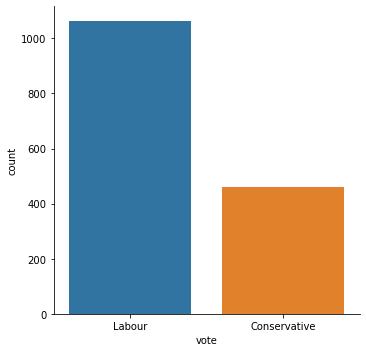

In [17]:
sns.catplot(x='vote',data=df,kind='count')

In [18]:
df.groupby(['vote','gender']).size()

vote          gender
Conservative  female    259
              male      203
Labour        female    553
              male      510
dtype: int64

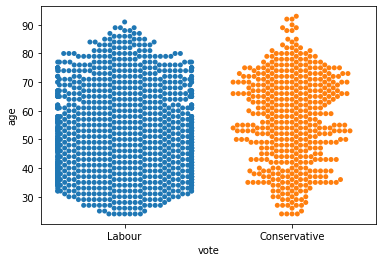

In [19]:
sns.swarmplot(x='vote',y='age',data=df)

In [36]:
df.shape[0]

1525

Text(0, 0.5, 'No: of Europsceptic Voters')

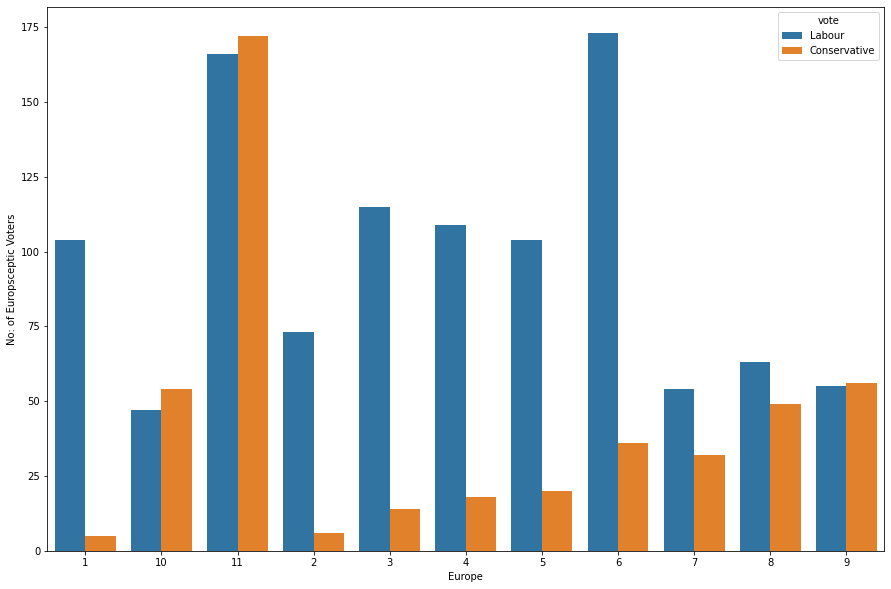

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(df['Europe'].astype('str'),hue=df['vote'],data=df)
plt.ylabel('No: of Europsceptic Voters')

Text(0, 0.5, 'No: of Voters having Political Knowledge')

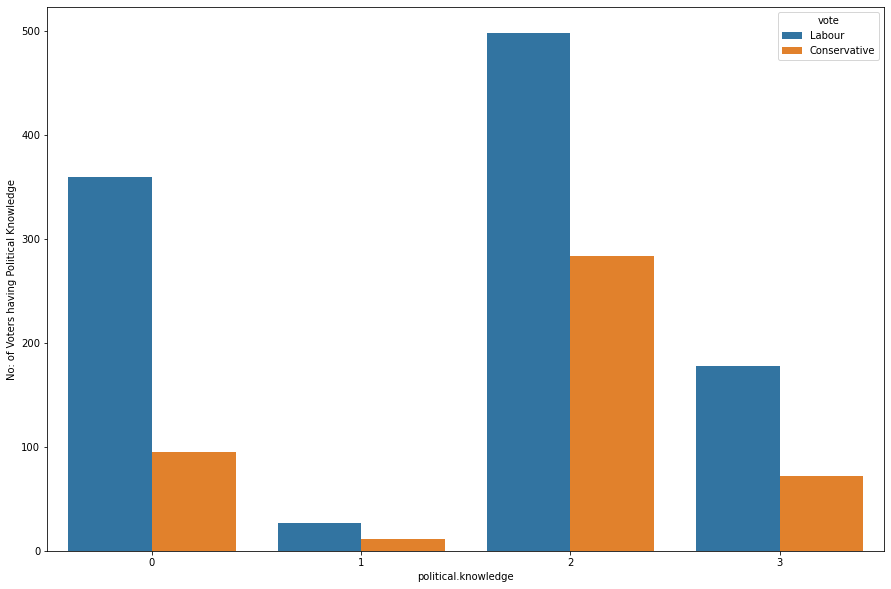

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(df['political.knowledge'].astype('str'),hue=df['vote'],data=df)
plt.ylabel('No: of Voters having Political Knowledge')

Text(0, 0.5, 'Count')

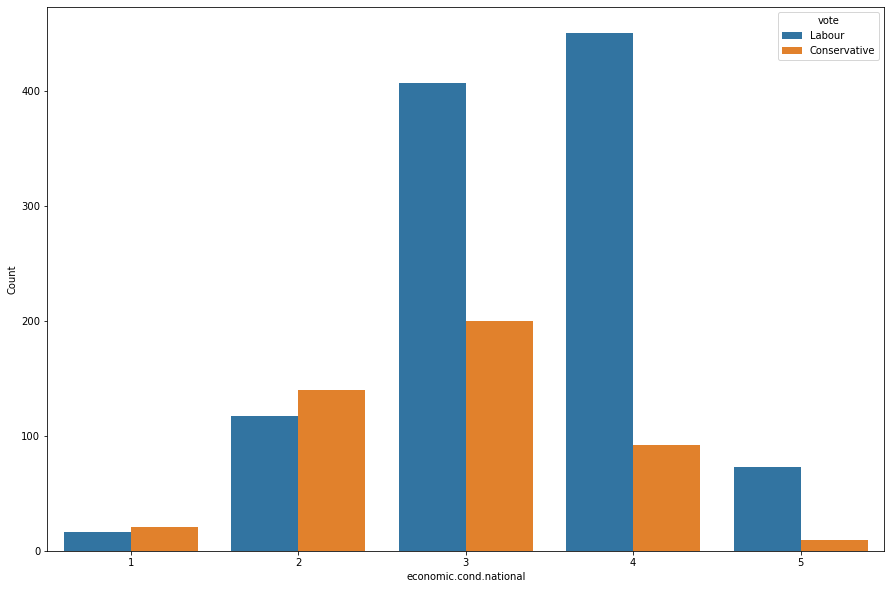

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(df['economic.cond.national'].astype('str'),hue=df['vote'],data=df)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

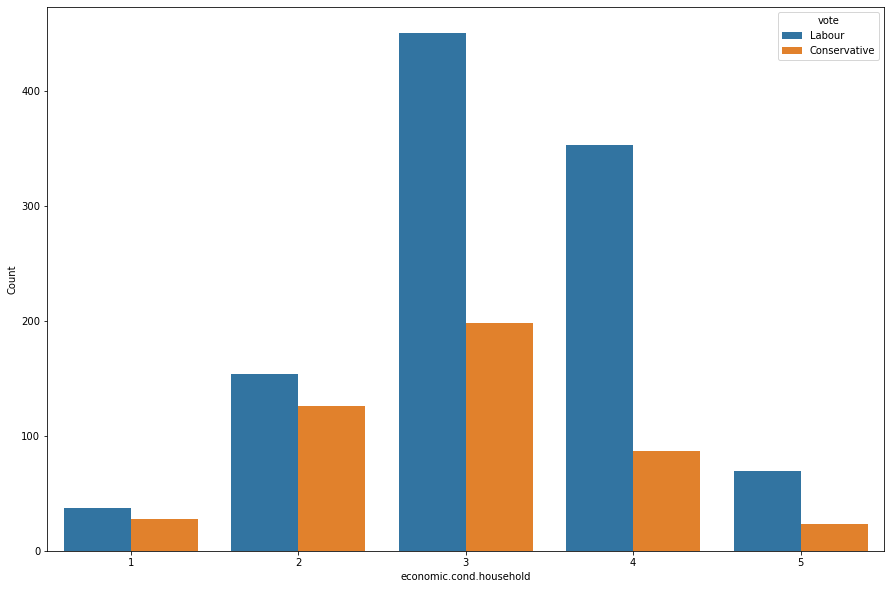

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(df['economic.cond.household'].astype('str'),hue=df['vote'],data=df)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

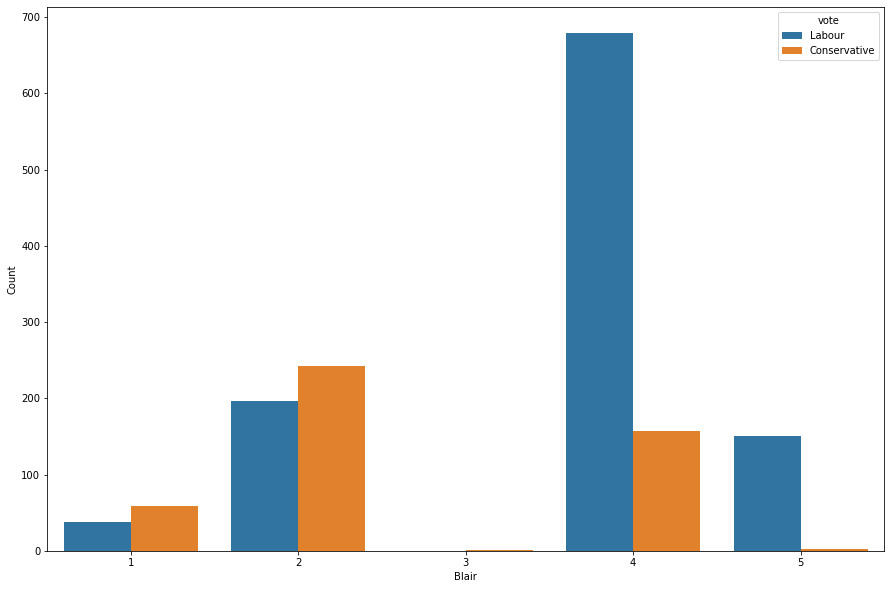

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(df['Blair'].astype('str'),hue=df['vote'],data=df)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

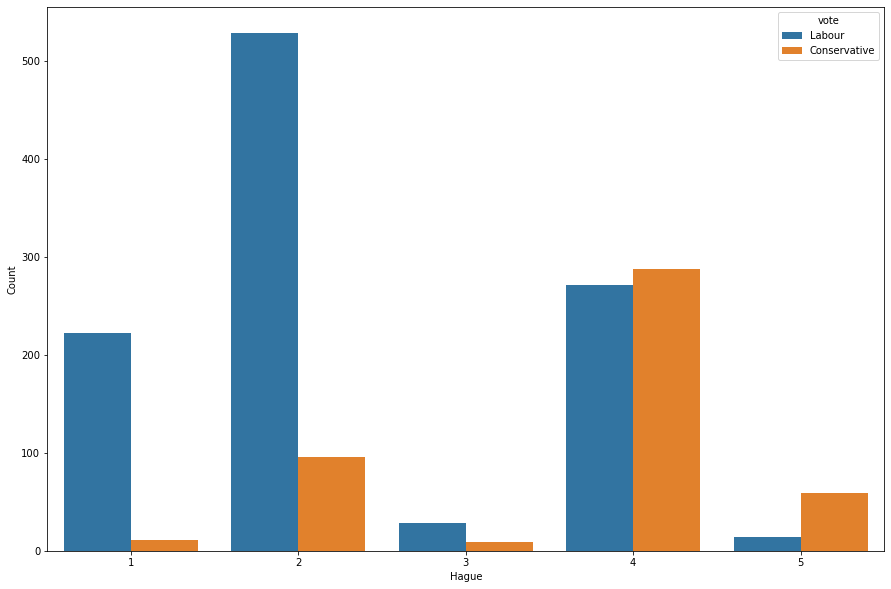

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(df['Hague'].astype('str'),hue=df['vote'],data=df)
plt.ylabel('Count')

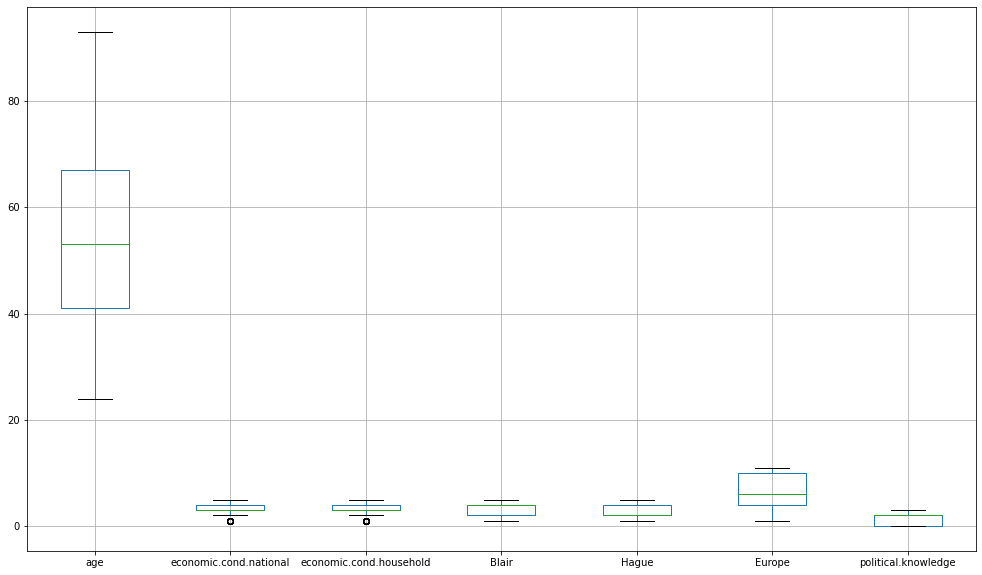

In [49]:
plt.figure(figsize=(17,10))
df.boxplot()

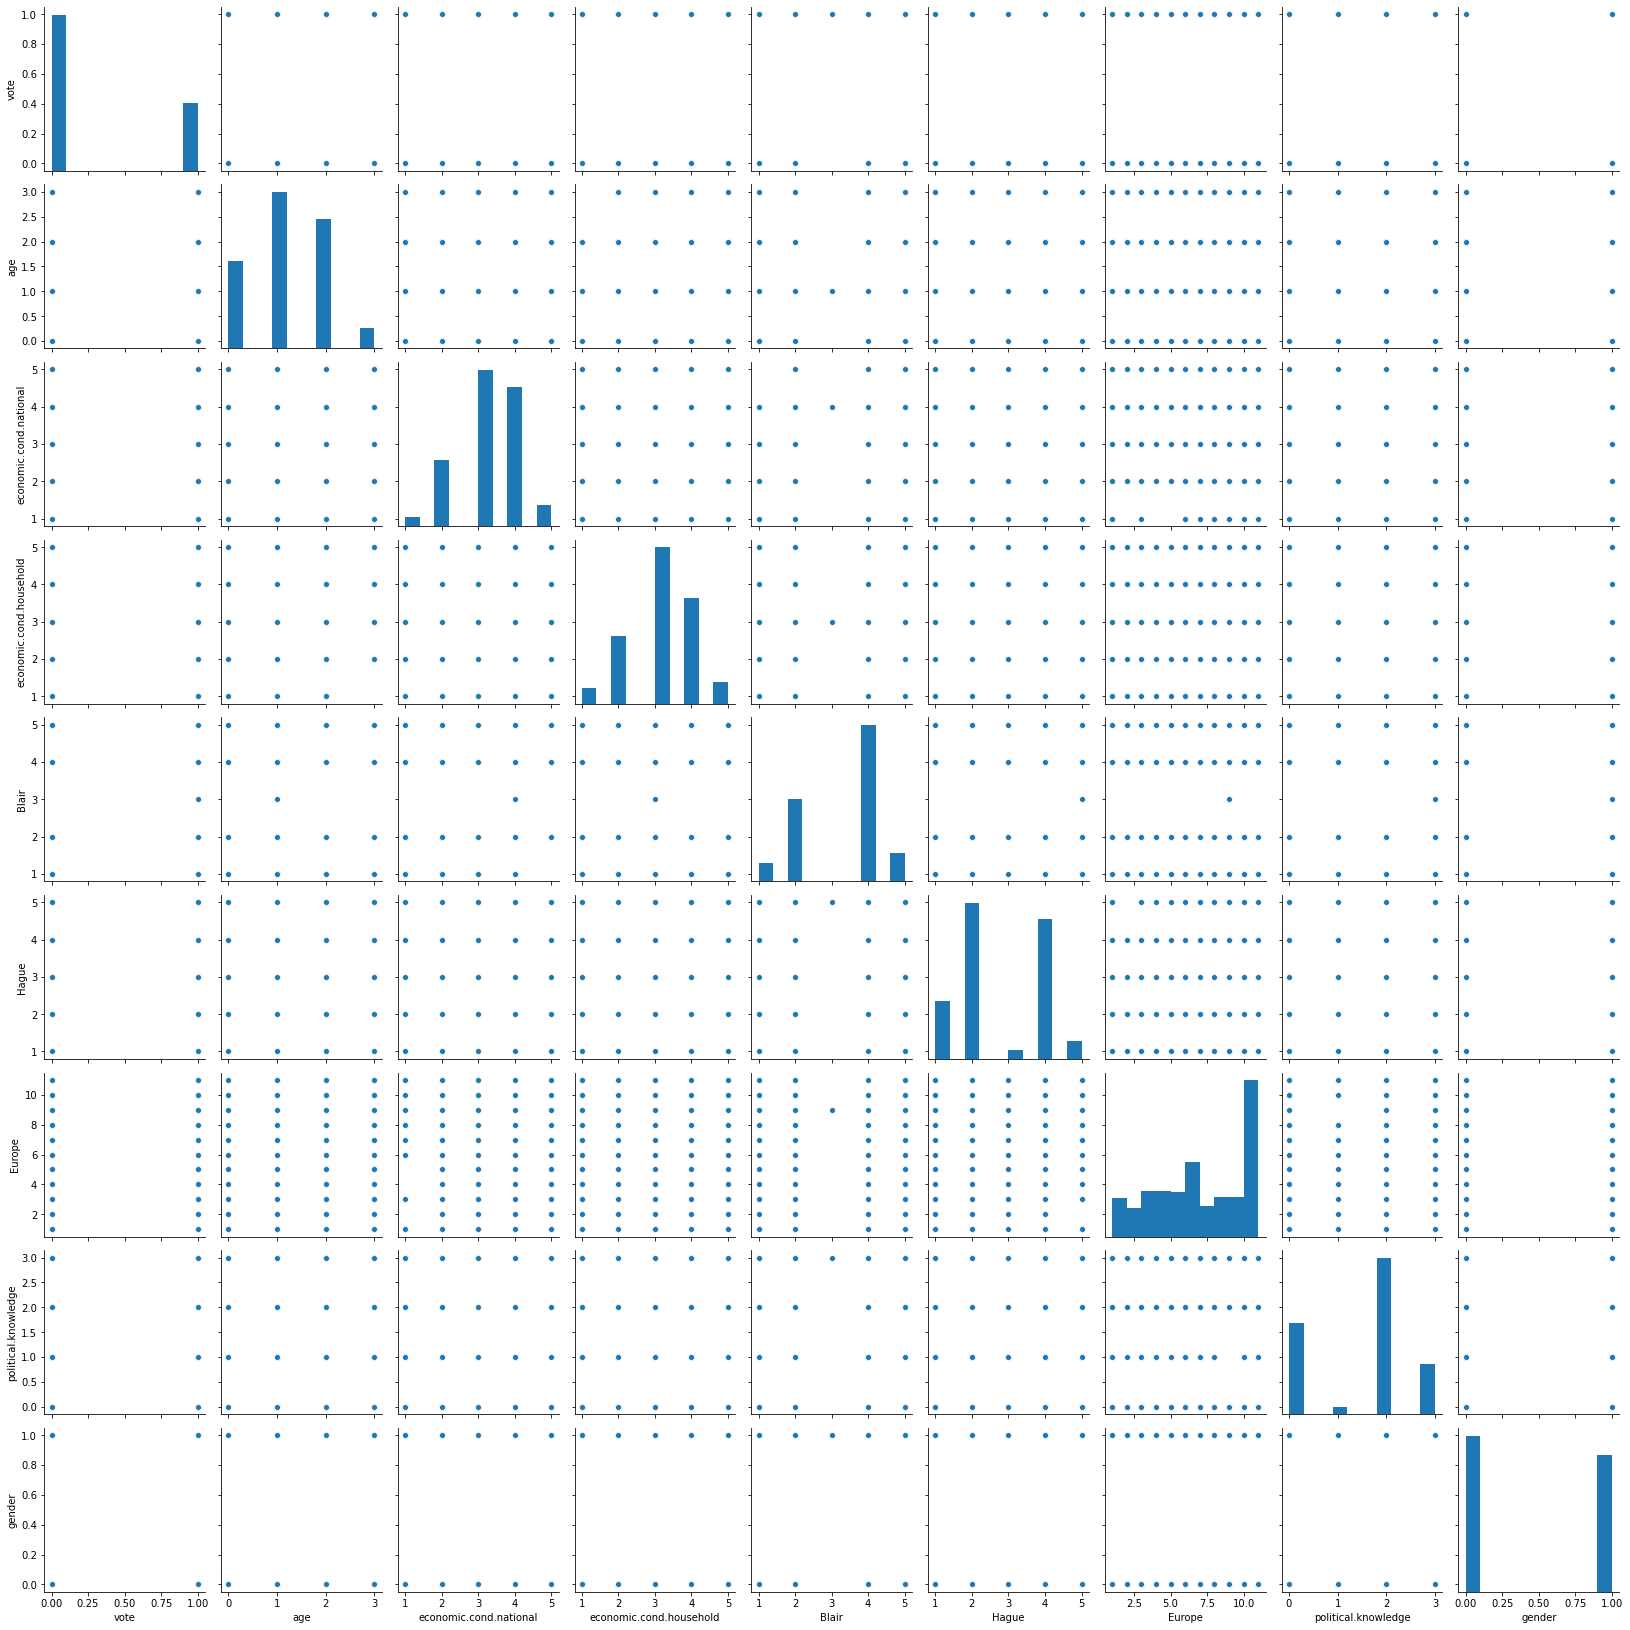

In [62]:
sns.pairplot(df)

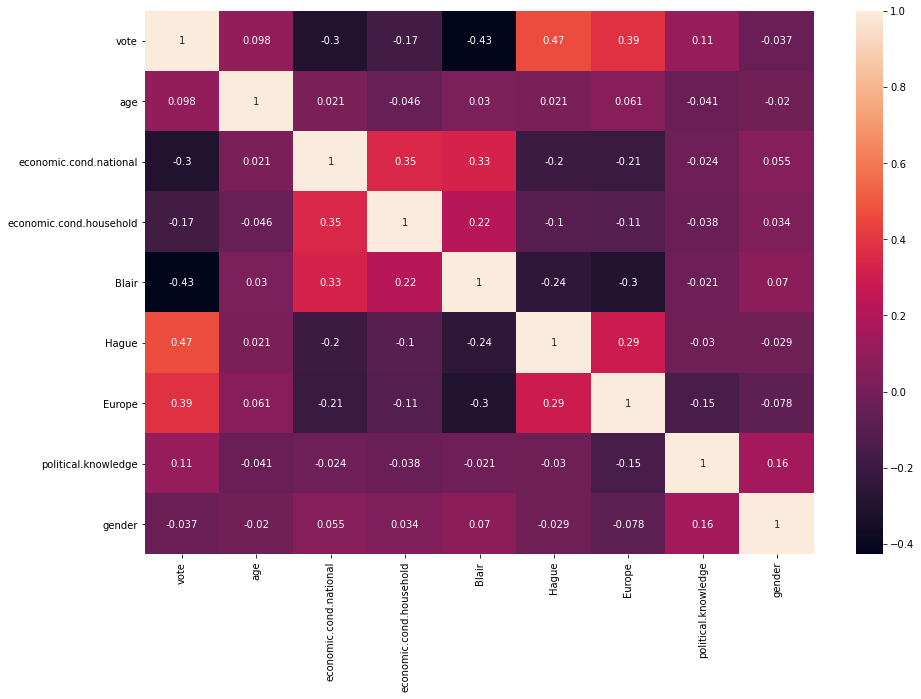

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df_bkup.corr(),annot=True)

**-------------------------------------------------------------------------------------------------------------------------------**

### ENCODING DATA,TRAIN TEST SPLIT

Encoding vote,gender to numeric type and binning-encoding for age

In [52]:
df.loc[(df['age']>=20) & (df['age']<40),'age']=0
df.loc[(df['age']>=40) & (df['age']<60),'age']=1
df.loc[(df['age']>=60) & (df['age']<80),'age']=2
df.loc[(df['age']>=80) & (df['age']<100),'age']=3

In [53]:
df.loc[df['gender']=='male','gender']=1
df.loc[df['gender']=='female','gender']=0
df.loc[df['vote']=='Labour','vote']=0
df.loc[df['vote']=='Conservative','vote']=1
df['gender']=df['gender'].astype('int64')
df['vote']=df['vote'].astype('int64')

In [66]:
#df=df_bkup.copy()

In [67]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,1,3,3,4,1,2,2,0
1,0,0,4,4,4,4,5,2,1
2,0,0,4,4,5,2,3,2,1
3,0,0,4,2,2,1,4,0,0
4,0,1,2,2,1,1,6,2,1


In [69]:
x=df.drop('vote',axis=1)
y=df['vote']

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

**-------------------------------------------------------------------------------------------------------------------------------**

### Model building and Performance

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.linear_model import LogisticRegression

**LDA**

In [72]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_train_score=lda.score(x_train,y_train)
lda_test_score=lda.score(x_test,y_test)

In [83]:
lda_clas_report_train=classification_report(y_train,lda.predict(x_train),output_dict=True)
lda_clas_report_test=classification_report(y_test,lda.predict(x_test),output_dict=True)
lda_precision_labour_train=lda_clas_report_train['0']['precision']
lda_precision_labour_test=lda_clas_report_test['0']['precision']
lda_precision_conser_train=lda_clas_report_train['1']['precision']
lda_precision_conser_test=lda_clas_report_test['1']['precision']

In [84]:
lda_recall_labour_train=lda_clas_report_train['0']['recall']
lda_recall_labour_test=lda_clas_report_test['0']['recall']
lda_recall_conser_train=lda_clas_report_train['1']['recall']
lda_recall_conser_test=lda_clas_report_test['1']['recall']

In [82]:
print('Train')
print('Accuracy score')
print(lda_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,lda.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,lda.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(lda_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,lda.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,lda.predict(x_test)))

Train
Accuracy score
0.8406747891283973
 
Confusion Matrix
[[661  74]
 [ 96 236]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       735
           1       0.76      0.71      0.74       332

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8231441048034934
 
Confusion Matrix
[[290  38]
 [ 43  87]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       328
           1       0.70      0.67      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Train
AUC: 0.889


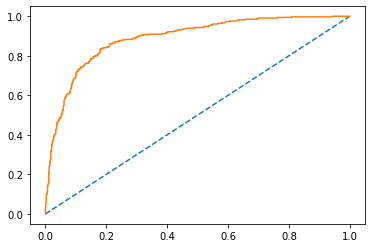

In [116]:
# predict probabilities
print('Train')
probs =lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

Test
AUC: 0.882


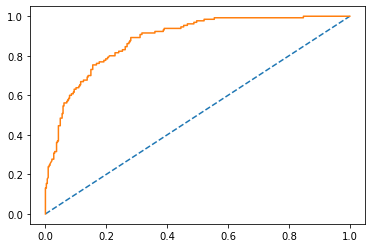

In [117]:
# predict probabilities
print('Test')
probs =lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

**Logistic Regression**

In [87]:
log=LogisticRegression()
log.fit(x_train,y_train)
log_train_score=log.score(x_train,y_train)
log_test_score=log.score(x_test,y_test)

In [88]:
log_clas_report_train=classification_report(y_train,log.predict(x_train),output_dict=True)
log_clas_report_test=classification_report(y_test,log.predict(x_test),output_dict=True)
log_precision_labour_train=log_clas_report_train['0']['precision']
log_precision_labour_test=log_clas_report_test['0']['precision']
log_precision_conser_train=log_clas_report_train['1']['precision']
log_precision_conser_test=log_clas_report_test['1']['precision']

In [89]:
log_recall_labour_train=log_clas_report_train['0']['recall']
log_recall_labour_test=log_clas_report_test['0']['recall']
log_recall_conser_train=log_clas_report_train['1']['recall']
log_recall_conser_test=log_clas_report_test['1']['recall']

In [90]:
print('Train')
print('Accuracy score')
print(log_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,log.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,log.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(log_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,log.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,log.predict(x_test)))

Train
Accuracy score
0.8369259606373008
 
Confusion Matrix
[[664  71]
 [103 229]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.69      0.72       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.84      0.83      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8209606986899564
 
Confusion Matrix
[[291  37]
 [ 45  85]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



Train
AUC: 0.889


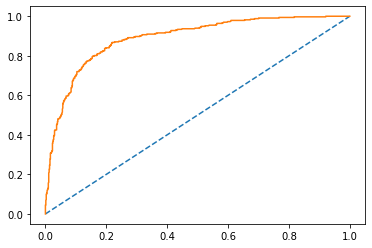

In [118]:
# predict probabilities
print('Train')
probs =log.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr)

Test
AUC: 0.881


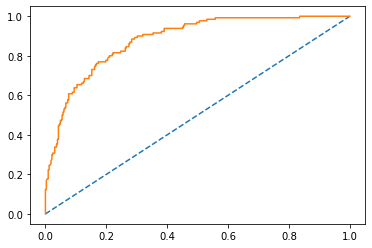

In [119]:
# predict probabilities
print('Test')
probs =log.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr)

**KNN**

In [93]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_train_score=knn.score(x_train,y_train)
knn_test_score=knn.score(x_test,y_test)

In [94]:
knn_clas_report_train=classification_report(y_train,knn.predict(x_train),output_dict=True)
knn_clas_report_test=classification_report(y_test,knn.predict(x_test),output_dict=True)
knn_precision_labour_train=knn_clas_report_train['0']['precision']
knn_precision_labour_test=knn_clas_report_test['0']['precision']
knn_precision_conser_train=knn_clas_report_train['1']['precision']
knn_precision_conser_test=knn_clas_report_test['1']['precision']

In [95]:
knn_recall_labour_train=knn_clas_report_train['0']['recall']
knn_recall_labour_test=knn_clas_report_test['0']['recall']
knn_recall_conser_train=knn_clas_report_train['1']['recall']
knn_recall_conser_test=knn_clas_report_test['1']['recall']

In [96]:
print('Train')
print('Accuracy score')
print(knn_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,knn.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,knn.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(knn_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,knn.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,knn.predict(x_test)))

Train
Accuracy score
0.8687910028116214
 
Confusion Matrix
[[672  63]
 [ 77 255]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       735
           1       0.80      0.77      0.78       332

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8013100436681223
 
Confusion Matrix
[[278  50]
 [ 41  89]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       328
           1       0.64      0.68      0.66       130

    accuracy                           0.80       458
   macro avg       0.76      0.77      0.76       458
weighted avg       0.81      0.80      0.80       458



Train
AUC: 0.934


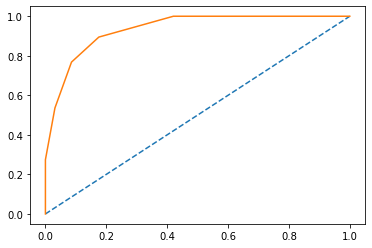

In [120]:
# predict probabilities
print('Train')
probs =knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)

Test
AUC: 0.863


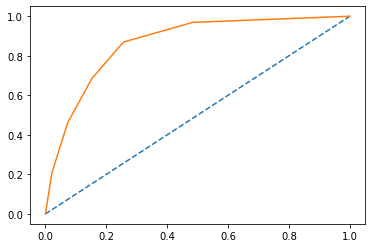

In [121]:
# predict probabilities
print('Test')
probs =knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

**Gaussian NB**

In [99]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_train_score=gnb.score(x_train,y_train)
gnb_test_score=gnb.score(x_test,y_test)

In [100]:
gnb_clas_report_train=classification_report(y_train,gnb.predict(x_train),output_dict=True)
gnb_clas_report_test=classification_report(y_test,gnb.predict(x_test),output_dict=True)
gnb_precision_labour_train=gnb_clas_report_train['0']['precision']
gnb_precision_labour_test=gnb_clas_report_test['0']['precision']
gnb_precision_conser_train=gnb_clas_report_train['1']['precision']
gnb_precision_conser_test=gnb_clas_report_test['1']['precision']

In [101]:
gnb_recall_labour_train=gnb_clas_report_train['0']['recall']
gnb_recall_labour_test=gnb_clas_report_test['0']['recall']
gnb_recall_conser_train=gnb_clas_report_train['1']['recall']
gnb_recall_conser_test=gnb_clas_report_test['1']['recall']

In [102]:
print('Train')
print('Accuracy score')
print(gnb_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,gnb.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,gnb.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(gnb_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,gnb.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,gnb.predict(x_test)))

Train
Accuracy score
0.8341143392689785
 
Confusion Matrix
[[649  86]
 [ 91 241]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.74      0.73      0.73       332

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.83      0.83      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8275109170305677
 
Confusion Matrix
[[285  43]
 [ 36  94]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.69      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



Train
AUC: 0.886


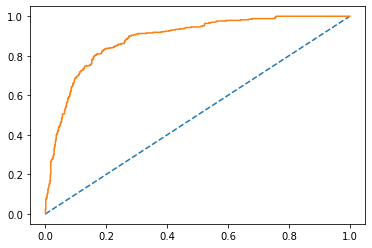

In [122]:
# predict probabilities
print('Train')
probs =gnb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gnb_train_auc)
# calculate roc curve
gnb_train_fpr, gnb_train_tpr, gnb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_train_fpr, gnb_train_tpr)

Test
AUC: 0.883


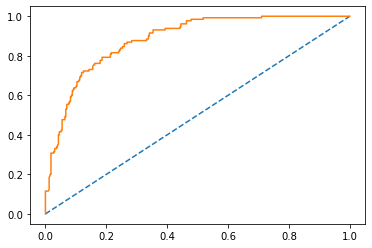

In [123]:
# predict probabilities
print('Test')
probs =gnb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gnb_test_auc)
# calculate roc curve
gnb_test_fpr, gnb_test_tpr, gnb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_test_fpr, gnb_test_tpr)

**SVM**

In [110]:
SVM=svm.SVC(probability=True)
SVM.fit(x_train,y_train)
SVM_train_score=SVM.score(x_train,y_train)
SVM_test_score=SVM.score(x_test,y_test)

In [111]:
SVM_clas_report_train=classification_report(y_train,SVM.predict(x_train),output_dict=True)
SVM_clas_report_test=classification_report(y_test,SVM.predict(x_test),output_dict=True)
SVM_precision_labour_train=SVM_clas_report_train['0']['precision']
SVM_precision_labour_test=SVM_clas_report_test['0']['precision']
SVM_precision_conser_train=SVM_clas_report_train['1']['precision']
SVM_precision_conser_test=SVM_clas_report_test['1']['precision']

In [112]:
SVM_recall_labour_train=SVM_clas_report_train['0']['recall']
SVM_recall_labour_test=SVM_clas_report_test['0']['recall']
SVM_recall_conser_train=SVM_clas_report_train['1']['recall']
SVM_recall_conser_test=SVM_clas_report_test['1']['recall']

In [113]:
print('Train')
print('Accuracy score')
print(SVM_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,SVM.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,SVM.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(SVM_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,SVM.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,SVM.predict(x_test)))

Train
Accuracy score
0.8425492033739457
 
Confusion Matrix
[[677  58]
 [110 222]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       735
           1       0.79      0.67      0.73       332

    accuracy                           0.84      1067
   macro avg       0.83      0.79      0.81      1067
weighted avg       0.84      0.84      0.84      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8165938864628821
 
Confusion Matrix
[[289  39]
 [ 45  85]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.65      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.82       458



Train
AUC: 0.902


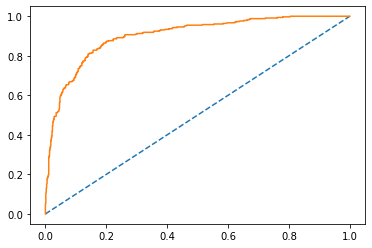

In [124]:
# predict probabilities
print('Train')
probs =SVM.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % SVM_train_auc)
# calculate roc curve
SVM_train_fpr, SVM_train_tpr, SVM_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_train_fpr, SVM_train_tpr)

Test
AUC: 0.891


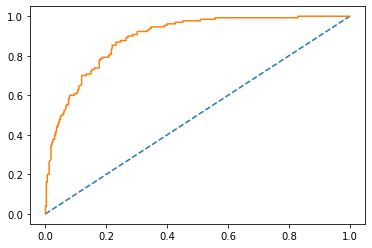

In [125]:
# predict probabilities
print('Test')
probs =SVM.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % SVM_test_auc)
# calculate roc curve
SVM_test_fpr, SVM_test_tpr, SVM_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_test_fpr, SVM_test_tpr)

**-------------------------------------------------------------------------------------------------------------------------------**

### Model Tuning -Bagging and Boosting

1. **SMOTE** is a technique used to enhance model performance,here we would not be using SMOTE.  
2. SMOTE is used to artifically create data to treat the imbalance of the target variable.This could affect the characterstics of the data in hand.  
3. Moreover the data is regarding exit-poll prediction,using SMOTE here would not make much sense.  
4. Therefore we could use GridSearch CV method to tune the parameters of model.
5. Data tuning was partly done in Data Encoding section when we binned the 'age' variable to make it numeric. 

In [128]:
from sklearn.model_selection import GridSearchCV

**LDA**

In [129]:
param_grid={
    
}
lda_model=LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = lda_model, param_grid = param_grid, cv = 5)

In [130]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
lda_tune = grid_search.best_estimator_
lda_tune

{}


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Logistic Regression**

In [137]:
param_grid = {
    'penalty': ['l1','l2'],
    'C':[0.01,0.0001,0.001]
}

log_model = LogisticRegression()

grid_search = GridSearchCV(estimator = log_model, param_grid = param_grid, cv = 5)

In [141]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
log_tune = grid_search.best_estimator_
log_tune

{'C': 0.01, 'penalty': 'l2'}


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**KNN**

In [150]:
param_grid = {
    'n_neighbors': [5,6,7],
    'weights':['uniform','distance',],
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = knn_model, param_grid = param_grid, cv = 5)

In [151]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
knn_tune = grid_search.best_estimator_
knn_tune

{'n_neighbors': 5, 'weights': 'uniform'}


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Gaussian Naive Bayes**

In [152]:
param_grid = {}

gnb_model = GaussianNB()

grid_search = GridSearchCV(estimator =gnb_model, param_grid = param_grid, cv = 5)

In [153]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
gnb_tune = grid_search.best_estimator_
gnb_tune

{}


GaussianNB(priors=None, var_smoothing=1e-09)

**Support Vector Machine**

In [180]:
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, ],
    'gamma': [0.001, 0.0001],
    'class_weight': ('balanced', None,)
}

SVM_model = svm.SVC(probability=True)

grid_search = GridSearchCV(estimator =SVM_model, param_grid = param_grid, cv = 5)

In [181]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
SVM_tune = grid_search.best_estimator_
SVM_tune

{'C': 10, 'class_weight': None, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### **Applying tuned model on Train and Test**

**LDA**

In [156]:
lda_tune.fit(x_train,y_train)
lda_tune_train_score=lda_tune.score(x_train,y_train)
lda_tune_test_score=lda_tune.score(x_test,y_test)

In [157]:
lda_tune_clas_report_train=classification_report(y_train,lda_tune.predict(x_train),output_dict=True)
lda_tune_clas_report_test=classification_report(y_test,lda_tune.predict(x_test),output_dict=True)
lda_tune_precision_labour_train=lda_tune_clas_report_train['0']['precision']
lda_tune_precision_labour_test=lda_tune_clas_report_test['0']['precision']
lda_tune_precision_conser_train=lda_tune_clas_report_train['1']['precision']
lda_tune_precision_conser_test=lda_tune_clas_report_test['1']['precision']

In [158]:
lda_tune_recall_labour_train=lda_tune_clas_report_train['0']['recall']
lda_tune_recall_labour_test=lda_tune_clas_report_test['0']['recall']
lda_tune_recall_conser_train=lda_tune_clas_report_train['1']['recall']
lda_tune_recall_conser_test=lda_tune_clas_report_test['1']['recall']

In [159]:
print('Train')
print('Accuracy score')
print(lda_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,lda_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,lda_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(lda_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,lda_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,lda_tune.predict(x_test)))

Train
Accuracy score
0.8406747891283973
 
Confusion Matrix
[[661  74]
 [ 96 236]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       735
           1       0.76      0.71      0.74       332

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8231441048034934
 
Confusion Matrix
[[290  38]
 [ 43  87]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       328
           1       0.70      0.67      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Train
AUC: 0.889


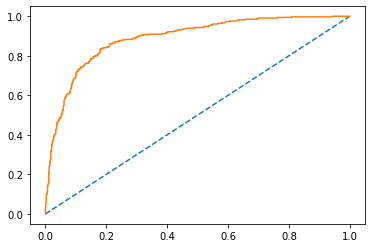

In [160]:
# predict probabilities
print('Train')
probs =lda_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_tune_train_auc)
# calculate roc curve
lda_tune_train_fpr, lda_tune_train_tpr, lda_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tune_train_fpr, lda_tune_train_tpr)

Test
AUC: 0.882


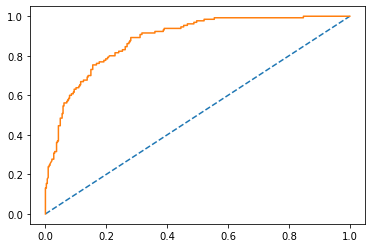

In [161]:
# predict probabilities
print('Test')
probs =lda_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_tune_test_auc)
# calculate roc curve
lda_tune_test_fpr, lda_tune_test_tpr, lda_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tune_test_fpr, lda_tune_test_tpr)

**Logistic Regression**

In [162]:
log_tune.fit(x_train,y_train)
log_tune_train_score=log_tune.score(x_train,y_train)
log_tune_test_score=log_tune.score(x_test,y_test)

In [163]:
log_tune_clas_report_train=classification_report(y_train,log_tune.predict(x_train),output_dict=True)
log_tune_clas_report_test=classification_report(y_test,log_tune.predict(x_test),output_dict=True)
log_tune_precision_labour_train=log_tune_clas_report_train['0']['precision']
log_tune_precision_labour_test=log_tune_clas_report_test['0']['precision']
log_tune_precision_conser_train=log_tune_clas_report_train['1']['precision']
log_tune_precision_conser_test=log_tune_clas_report_test['1']['precision']

In [164]:
log_tune_recall_labour_train=log_tune_clas_report_train['0']['recall']
log_tune_recall_labour_test=log_tune_clas_report_test['0']['recall']
log_tune_recall_conser_train=log_tune_clas_report_train['1']['recall']
log_tune_recall_conser_test=log_tune_clas_report_test['1']['recall']

In [165]:
print('Train')
print('Accuracy score')
print(log_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,log_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,log_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(log_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,log_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,log_tune.predict(x_test)))

Train
Accuracy score
0.8294283036551078
 
Confusion Matrix
[[673  62]
 [120 212]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       735
           1       0.77      0.64      0.70       332

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.82      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8296943231441049
 
Confusion Matrix
[[297  31]
 [ 47  83]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       328
           1       0.73      0.64      0.68       130

    accuracy                           0.83       458
   macro avg       0.80      0.77      0.78       458
weighted avg       0.82      0.83      0.83       458



Train
AUC: 0.885


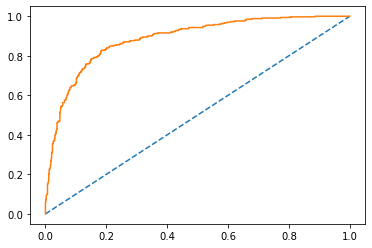

In [166]:
# predict probabilities
print('Train')
probs =log_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_tune_train_auc)
# calculate roc curve
log_tune_train_fpr, log_tune_train_tpr, log_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_tune_train_fpr, log_tune_train_tpr)

Test
AUC: 0.879


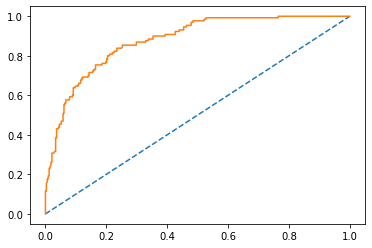

In [167]:
# predict probabilities
print('Test')
probs =log_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_tune_test_auc)
# calculate roc curve
log_tune_test_fpr, log_tune_test_tpr, log_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_tune_test_fpr, log_tune_test_tpr)

**KNN**

In [168]:
knn_tune.fit(x_train,y_train)
knn_tune_train_score=knn_tune.score(x_train,y_train)
knn_tune_test_score=knn_tune.score(x_test,y_test)

In [169]:
knn_tune_clas_report_train=classification_report(y_train,knn_tune.predict(x_train),output_dict=True)
knn_tune_clas_report_test=classification_report(y_test,knn_tune.predict(x_test),output_dict=True)
knn_tune_precision_labour_train=knn_tune_clas_report_train['0']['precision']
knn_tune_precision_labour_test=knn_tune_clas_report_test['0']['precision']
knn_tune_precision_conser_train=knn_tune_clas_report_train['1']['precision']
knn_tune_precision_conser_test=knn_tune_clas_report_test['1']['precision']

In [170]:
knn_tune_recall_labour_train=knn_tune_clas_report_train['0']['recall']
knn_tune_recall_labour_test=knn_tune_clas_report_test['0']['recall']
knn_tune_recall_conser_train=knn_tune_clas_report_train['1']['recall']
knn_tune_recall_conser_test=knn_tune_clas_report_test['1']['recall']

In [171]:
print('Train')
print('Accuracy score')
print(knn_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,knn_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,knn_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(knn_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,knn_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,knn_tune.predict(x_test)))

Train
Accuracy score
0.8687910028116214
 
Confusion Matrix
[[672  63]
 [ 77 255]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       735
           1       0.80      0.77      0.78       332

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8013100436681223
 
Confusion Matrix
[[278  50]
 [ 41  89]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       328
           1       0.64      0.68      0.66       130

    accuracy                           0.80       458
   macro avg       0.76      0.77      0.76       458
weighted avg       0.81      0.80      0.80       458



Train
AUC: 0.934


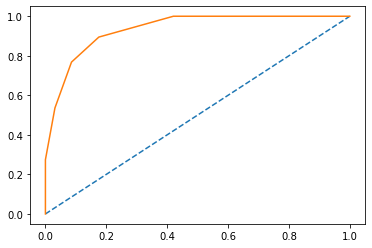

In [172]:
# predict probabilities
print('Train')
probs =knn_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_tune_train_auc)
# calculate roc curve
knn_tune_train_fpr, knn_tune_train_tpr, knn_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tune_train_fpr, knn_tune_train_tpr)

Test
AUC: 0.863


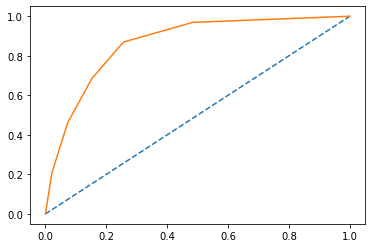

In [173]:
# predict probabilities
print('Test')
probs =knn_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_tune_test_auc)
# calculate roc curve
knn_tune_test_fpr, knn_tune_test_tpr, knn_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tune_test_fpr, knn_tune_test_tpr)

**Gaussian NB**

In [174]:
gnb_tune.fit(x_train,y_train)
gnb_tune_train_score=gnb_tune.score(x_train,y_train)
gnb_tune_test_score=gnb_tune.score(x_test,y_test)

In [175]:
gnb_tune_clas_report_train=classification_report(y_train,gnb_tune.predict(x_train),output_dict=True)
gnb_tune_clas_report_test=classification_report(y_test,gnb_tune.predict(x_test),output_dict=True)
gnb_tune_precision_labour_train=gnb_tune_clas_report_train['0']['precision']
gnb_tune_precision_labour_test=gnb_tune_clas_report_test['0']['precision']
gnb_tune_precision_conser_train=gnb_tune_clas_report_train['1']['precision']
gnb_tune_precision_conser_test=gnb_tune_clas_report_test['1']['precision']

In [176]:
gnb_tune_recall_labour_train=gnb_tune_clas_report_train['0']['recall']
gnb_tune_recall_labour_test=gnb_tune_clas_report_test['0']['recall']
gnb_tune_recall_conser_train=gnb_tune_clas_report_train['1']['recall']
gnb_tune_recall_conser_test=gnb_tune_clas_report_test['1']['recall']

In [177]:
print('Train')
print('Accuracy score')
print(gnb_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,gnb_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,gnb_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(gnb_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,gnb_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,gnb_tune.predict(x_test)))

Train
Accuracy score
0.8341143392689785
 
Confusion Matrix
[[649  86]
 [ 91 241]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.74      0.73      0.73       332

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.83      0.83      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8275109170305677
 
Confusion Matrix
[[285  43]
 [ 36  94]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.69      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



Train
AUC: 0.886


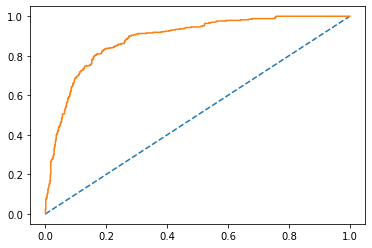

In [178]:
# predict probabilities
print('Train')
probs =gnb_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gnb_tune_train_auc)
# calculate roc curve
gnb_tune_train_fpr, gnb_tune_train_tpr, gnb_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_tune_train_fpr, gnb_tune_train_tpr)

Test
AUC: 0.883


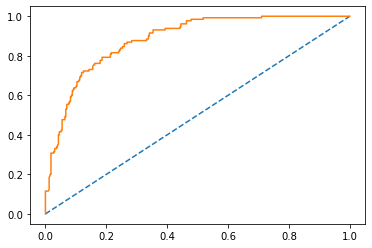

In [179]:
# predict probabilities
print('Test')
probs =gnb_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gnb_tune_test_auc)
# calculate roc curve
gnb_tune_test_fpr, gnb_tune_test_tpr, gnb_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_tune_test_fpr, gnb_tune_test_tpr)

**SVM**

In [182]:
SVM_tune.fit(x_train,y_train)
SVM_tune_train_score=SVM_tune.score(x_train,y_train)
SVM_tune_test_score=SVM_tune.score(x_test,y_test)

In [183]:
SVM_tune_clas_report_train=classification_report(y_train,SVM_tune.predict(x_train),output_dict=True)
SVM_tune_clas_report_test=classification_report(y_test,SVM_tune.predict(x_test),output_dict=True)
SVM_tune_precision_labour_train=SVM_tune_clas_report_train['0']['precision']
SVM_tune_precision_labour_test=SVM_tune_clas_report_test['0']['precision']
SVM_tune_precision_conser_train=SVM_tune_clas_report_train['1']['precision']
SVM_tune_precision_conser_test=SVM_tune_clas_report_test['1']['precision']

In [184]:
SVM_tune_recall_labour_train=SVM_tune_clas_report_train['0']['recall']
SVM_tune_recall_labour_test=SVM_tune_clas_report_test['0']['recall']
SVM_tune_recall_conser_train=SVM_tune_clas_report_train['1']['recall']
SVM_tune_recall_conser_test=SVM_tune_clas_report_test['1']['recall']

In [185]:
print('Train')
print('Accuracy score')
print(SVM_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,SVM_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,SVM_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(SVM_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,SVM_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,SVM_tune.predict(x_test)))

Train
Accuracy score
0.8397375820056232
 
Confusion Matrix
[[665  70]
 [101 231]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       735
           1       0.77      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8275109170305677
 
Confusion Matrix
[[293  35]
 [ 44  86]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.71      0.66      0.69       130

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.83       458



Train
AUC: 0.890


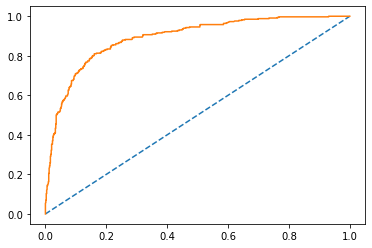

In [186]:
# predict probabilities
print('Train')
probs =SVM_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % SVM_tune_train_auc)
# calculate roc curve
SVM_tune_train_fpr, SVM_tune_train_tpr, SVM_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_tune_train_fpr, SVM_tune_train_tpr)

Test
AUC: 0.881


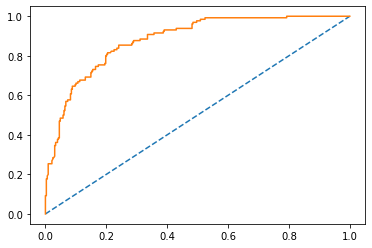

In [187]:
# predict probabilities
print('Test')
probs =SVM_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % SVM_tune_test_auc)
# calculate roc curve
SVM_tune_test_fpr, SVM_tune_test_tpr, SVM_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_tune_test_fpr, SVM_tune_test_tpr)

### **Before Tuning**

In [193]:
index=['Accuracy_train', 'AUC_train','Recall_Labour_train','Precision_Labour_train','Recall_Conser_train','Precision_Conser_train']
data = pd.DataFrame({'LDA_Train':[lda_train_score,lda_train_auc,lda_recall_labour_train,lda_precision_labour_train,lda_recall_conser_train,lda_recall_labour_train],
        'Logistic_Train':[log_train_score,log_train_auc,log_recall_labour_train,log_precision_labour_train,log_recall_conser_train,log_recall_labour_train],
       'KNN_Train':[knn_train_score,knn_train_auc,knn_recall_labour_train,knn_precision_labour_train,knn_recall_conser_train,knn_recall_labour_train],
        'GaussianNb_Train':[gnb_train_score,gnb_train_auc,gnb_recall_labour_train,gnb_precision_labour_train,gnb_recall_conser_train,gnb_recall_labour_train],
       'SVM_Train':[SVM_train_score,SVM_train_auc,SVM_recall_labour_train,SVM_precision_labour_train,SVM_recall_conser_train,SVM_recall_labour_train]},index=index)
print('Train')
round(data,2)

Train


,LDA_Train,Logistic_Train,KNN_Train,GaussianNb_Train,SVM_Train
Accuracy_train,0.84,0.84,0.87,0.83,0.84
AUC_train,0.89,0.89,0.93,0.89,0.90
Recall_Labour_train,0.90,0.90,0.91,0.88,0.92
Precision_Labour_train,0.87,0.87,0.90,0.88,0.86
Recall_Conser_train,0.71,0.69,0.77,0.73,0.67
Precision_Conser_train,0.90,0.90,0.91,0.88,0.92


In [194]:
index=['Accuracy_test', 'AUC_test','Recall_Labour_test','Precision_Labour_test','Recall_Conser_test','Precision_Conser_test']
data = pd.DataFrame({'LDA_test':[lda_test_score,lda_test_auc,lda_recall_labour_test,lda_precision_labour_test,lda_recall_conser_test,lda_recall_labour_test],
        'Logistic_test':[log_test_score,log_test_auc,log_recall_labour_test,log_precision_labour_test,log_recall_conser_test,log_recall_labour_test],
       'KNN_test':[knn_test_score,knn_test_auc,knn_recall_labour_test,knn_precision_labour_test,knn_recall_conser_test,knn_recall_labour_test],
        'GaussianNb_test':[gnb_test_score,gnb_test_auc,gnb_recall_labour_test,gnb_precision_labour_test,gnb_recall_conser_test,gnb_recall_labour_test],
       'SVM_test':[SVM_test_score,SVM_test_auc,SVM_recall_labour_test,SVM_precision_labour_test,SVM_recall_conser_test,SVM_recall_labour_test]},index=index)
print('Test')
round(data,2)

Test


,LDA_test,Logistic_test,KNN_test,GaussianNb_test,SVM_test
Accuracy_test,0.82,0.82,0.80,0.83,0.82
AUC_test,0.88,0.88,0.86,0.88,0.89
Recall_Labour_test,0.88,0.89,0.85,0.87,0.88
Precision_Labour_test,0.87,0.87,0.87,0.89,0.87
Recall_Conser_test,0.67,0.65,0.68,0.72,0.65
Precision_Conser_test,0.88,0.89,0.85,0.87,0.88


### After Tuning

In [195]:
index=['Accuracy_train', 'AUC_train','Recall_Labour_train','Precision_Labour_train','Recall_Conser_train','Precision_Conser_train']
data = pd.DataFrame({'LDA_tune_Train':[lda_tune_train_score,lda_tune_train_auc,lda_tune_recall_labour_train,lda_tune_precision_labour_train,lda_tune_recall_conser_train,lda_tune_recall_labour_train],
        'Logistic_tune_Train':[log_tune_train_score,log_tune_train_auc,log_tune_recall_labour_train,log_tune_precision_labour_train,log_tune_recall_conser_train,log_tune_recall_labour_train],
       'KNN_tune_Train':[knn_tune_train_score,knn_tune_train_auc,knn_tune_recall_labour_train,knn_tune_precision_labour_train,knn_tune_recall_conser_train,knn_tune_recall_labour_train],
        'GaussianNb_Train':[gnb_tune_train_score,gnb_tune_train_auc,gnb_tune_recall_labour_train,gnb_tune_precision_labour_train,gnb_tune_recall_conser_train,gnb_tune_recall_labour_train],
       'SVM_tune_Train':[SVM_tune_train_score,SVM_tune_train_auc,SVM_tune_recall_labour_train,SVM_tune_precision_labour_train,SVM_tune_recall_conser_train,SVM_tune_recall_labour_train]},index=index)
print('Train')
round(data,2)

Train


,LDA_tune_Train,Logistic_tune_Train,KNN_tune_Train,GaussianNb_Train,SVM_tune_Train
Accuracy_train,0.84,0.83,0.87,0.83,0.84
AUC_train,0.89,0.89,0.93,0.89,0.89
Recall_Labour_train,0.90,0.92,0.91,0.88,0.90
Precision_Labour_train,0.87,0.85,0.90,0.88,0.87
Recall_Conser_train,0.71,0.64,0.77,0.73,0.70
Precision_Conser_train,0.90,0.92,0.91,0.88,0.90


In [196]:
index=['Accuracy_test', 'AUC_test','Recall_Labour_test','Precision_Labour_test','Recall_Conser_test','Precision_Conser_test']
data = pd.DataFrame({'LDA_test':[lda_test_score,lda_test_auc,lda_recall_labour_test,lda_precision_labour_test,lda_recall_conser_test,lda_recall_labour_test],
        'Logistic_test':[log_test_score,log_test_auc,log_recall_labour_test,log_precision_labour_test,log_recall_conser_test,log_recall_labour_test],
       'KNN_test':[knn_test_score,knn_test_auc,knn_recall_labour_test,knn_precision_labour_test,knn_recall_conser_test,knn_recall_labour_test],
        'GaussianNb_test':[gnb_test_score,gnb_test_auc,gnb_recall_labour_test,gnb_precision_labour_test,gnb_recall_conser_test,gnb_recall_labour_test],
       'SVM_test':[SVM_test_score,SVM_test_auc,SVM_recall_labour_test,SVM_precision_labour_test,SVM_recall_conser_test,SVM_recall_labour_test]},index=index)
print('Test')
round(data,2)

Test


,LDA_test,Logistic_test,KNN_test,GaussianNb_test,SVM_test
Accuracy_test,0.82,0.82,0.80,0.83,0.82
AUC_test,0.88,0.88,0.86,0.88,0.89
Recall_Labour_test,0.88,0.89,0.85,0.87,0.88
Precision_Labour_test,0.87,0.87,0.87,0.89,0.87
Recall_Conser_test,0.67,0.65,0.68,0.72,0.65
Precision_Conser_test,0.88,0.89,0.85,0.87,0.88


**-------------------------------------------------------------------------------------------------------------------------------**

### Bagging and Boosting

### **Bagging Classifier**

In [197]:
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [216]:
rfcl=RandomForestClassifier()
bag=BaggingClassifier(base_estimator=rfcl)
bag.fit(x_train,y_train)
bag_train_score=bag.score(x_train,y_train)
bag_test_score=bag.score(x_test,y_test)

In [217]:
bag_clas_report_train=classification_report(y_train,bag.predict(x_train),output_dict=True)
bag_clas_report_test=classification_report(y_test,bag.predict(x_test),output_dict=True)
bag_precision_labour_train=bag_clas_report_train['0']['precision']
bag_precision_labour_test=bag_clas_report_test['0']['precision']
bag_precision_conser_train=bag_clas_report_train['1']['precision']
bag_precision_conser_test=bag_clas_report_test['1']['precision']

In [218]:
bag_recall_labour_train=bag_clas_report_train['0']['recall']
bag_recall_labour_test=bag_clas_report_test['0']['recall']
bag_recall_conser_train=bag_clas_report_train['1']['recall']
bag_recall_conser_test=bag_clas_report_test['1']['recall']

In [219]:
print('Train')
print('Accuracy score')
print(bag_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,bag.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,bag.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(bag_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,bag.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,bag.predict(x_test)))

Train
Accuracy score
0.9531396438612934
 
Confusion Matrix
[[719  16]
 [ 34 298]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       735
           1       0.95      0.90      0.92       332

    accuracy                           0.95      1067
   macro avg       0.95      0.94      0.94      1067
weighted avg       0.95      0.95      0.95      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8144104803493449
 
Confusion Matrix
[[285  43]
 [ 42  88]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



Train
AUC: 0.991


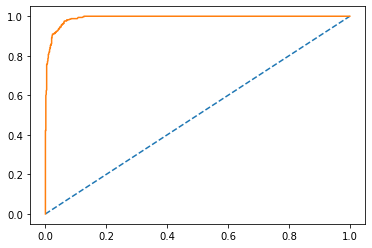

In [220]:
# predict probabilities
print('Train')
probs =bag.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr)

Test
AUC: 0.891


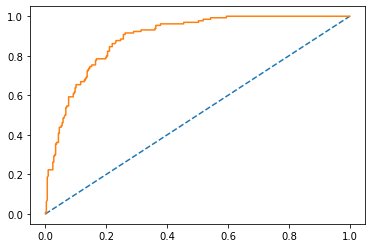

In [221]:
# predict probabilities
print('Test')
probs =bag.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr)

### XGBoost Classifier

In [204]:
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
xgb_train_score=xgb.score(x_train,y_train)
xgb_test_score=xgb.score(x_test,y_test)

In [205]:
xgb_clas_report_train=classification_report(y_train,xgb.predict(x_train),output_dict=True)
xgb_clas_report_test=classification_report(y_test,xgb.predict(x_test),output_dict=True)
xgb_precision_labour_train=xgb_clas_report_train['0']['precision']
xgb_precision_labour_test=xgb_clas_report_test['0']['precision']
xgb_precision_conser_train=xgb_clas_report_train['1']['precision']
xgb_precision_conser_test=xgb_clas_report_test['1']['precision']

In [206]:
xgb_recall_labour_train=xgb_clas_report_train['0']['recall']
xgb_recall_labour_test=xgb_clas_report_test['0']['recall']
xgb_recall_conser_train=xgb_clas_report_train['1']['recall']
xgb_recall_conser_test=xgb_clas_report_test['1']['recall']

In [207]:
print('Train')
print('Accuracy score')
print(xgb_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,xgb.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,xgb.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(xgb_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,xgb.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,xgb.predict(x_test)))

Train
Accuracy score
0.9662605435801312
 
Confusion Matrix
[[721  14]
 [ 22 310]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       735
           1       0.96      0.93      0.95       332

    accuracy                           0.97      1067
   macro avg       0.96      0.96      0.96      1067
weighted avg       0.97      0.97      0.97      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8056768558951966
 
Confusion Matrix
[[277  51]
 [ 38  92]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       328
           1       0.64      0.71      0.67       130

    accuracy                           0.81       458
   macro avg       0.76      0.78      0.77       458
weighted avg       0.81      0.81      0.81       458



Train
AUC: 0.996


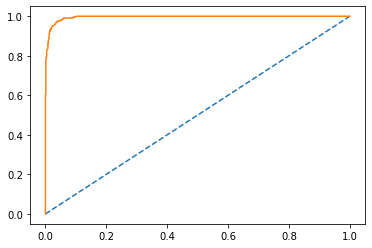

In [208]:
# predict probabilities
print('Train')
probs =xgb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
xgb_train_fpr, xgb_train_tpr, xgb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr)

Test
AUC: 0.862


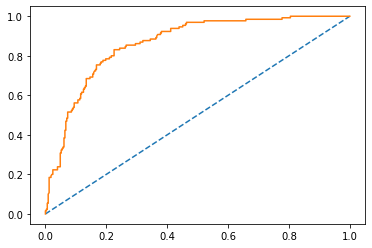

In [209]:
# predict probabilities
print('Test')
probs =xgb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_test_auc)
# calculate roc curve
xgb_test_fpr, xgb_test_tpr, xgb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_test_fpr, xgb_test_tpr)

### AdaBoost Classifier

In [210]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_train_score=ada.score(x_train,y_train)
ada_test_score=ada.score(x_test,y_test)

In [211]:
ada_clas_report_train=classification_report(y_train,ada.predict(x_train),output_dict=True)
ada_clas_report_test=classification_report(y_test,ada.predict(x_test),output_dict=True)
ada_precision_labour_train=ada_clas_report_train['0']['precision']
ada_precision_labour_test=ada_clas_report_test['0']['precision']
ada_precision_conser_train=ada_clas_report_train['1']['precision']
ada_precision_conser_test=ada_clas_report_test['1']['precision']

In [212]:
ada_recall_labour_train=ada_clas_report_train['0']['recall']
ada_recall_labour_test=ada_clas_report_test['0']['recall']
ada_recall_conser_train=ada_clas_report_train['1']['recall']
ada_recall_conser_test=ada_clas_report_test['1']['recall']

In [213]:
print('Train')
print('Accuracy score')
print(ada_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,ada.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,ada.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(ada_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,ada.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,ada.predict(x_test)))

Train
Accuracy score
0.8406747891283973
 
Confusion Matrix
[[662  73]
 [ 97 235]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       735
           1       0.76      0.71      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8144104803493449
 
Confusion Matrix
[[285  43]
 [ 42  88]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



Train
AUC: 0.901


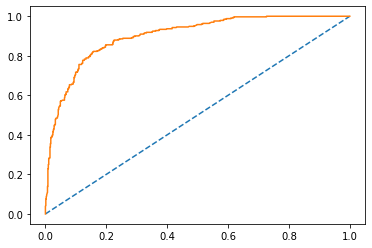

In [214]:
# predict probabilities
print('Train')
probs =ada.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr)

Test
AUC: 0.881


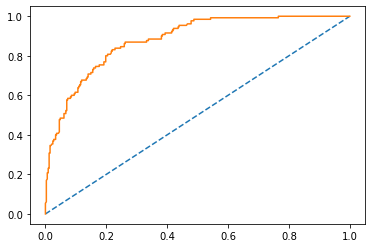

In [215]:
# predict probabilities
print('Test')
probs =ada.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ada_test_auc)
# calculate roc curve
ada_test_fpr, ada_test_tpr, ada_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_test_fpr, ada_test_tpr)

### Gradient Boosting

In [382]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_train_score=gbc.score(x_train,y_train)
gbc_test_score=gbc.score(x_test,y_test)

In [383]:
gbc_clas_report_train=classification_report(y_train,gbc.predict(x_train),output_dict=True)
gbc_clas_report_test=classification_report(y_test,gbc.predict(x_test),output_dict=True)
gbc_precision_labour_train=gbc_clas_report_train['0']['precision']
gbc_precision_labour_test=gbc_clas_report_test['0']['precision']
gbc_precision_conser_train=gbc_clas_report_train['1']['precision']
gbc_precision_conser_test=gbc_clas_report_test['1']['precision']

In [384]:
gbc_recall_labour_train=gbc_clas_report_train['0']['recall']
gbc_recall_labour_test=gbc_clas_report_test['0']['recall']
gbc_recall_conser_train=gbc_clas_report_train['1']['recall']
gbc_recall_conser_test=gbc_clas_report_test['1']['recall']

In [385]:
print('Train')
print('Accuracy score')
print(gbc_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,gbc.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,gbc.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(gbc_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,gbc.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,gbc.predict(x_test)))

Train
Accuracy score
0.8753514526710403
 
Confusion Matrix
[[674  61]
 [ 72 260]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       735
           1       0.81      0.78      0.80       332

    accuracy                           0.88      1067
   macro avg       0.86      0.85      0.85      1067
weighted avg       0.87      0.88      0.87      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8187772925764192
 
Confusion Matrix
[[281  47]
 [ 36  94]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       328
           1       0.67      0.72      0.69       130

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458



Train
AUC: 0.942


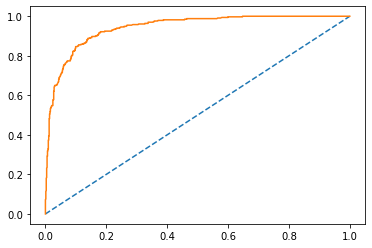

In [386]:
# predict probabilities
print('Train')
probs =gbc.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbc_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gbc_train_auc)
# calculate roc curve
gbc_train_fpr, gbc_train_tpr, gbc_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbc_train_fpr, gbc_train_tpr)

Test
AUC: 0.896


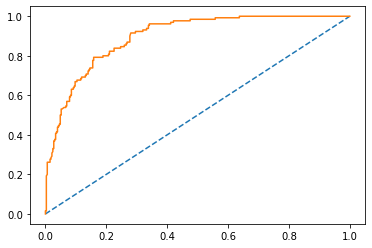

In [387]:
# predict probabilities
print('Test')
probs =gbc.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbc_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gbc_test_auc)
# calculate roc curve
gbc_test_fpr, gbc_test_tpr, gbc_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbc_test_fpr, gbc_test_tpr)

## Tuning Bagging and Boosting

**Bagging**

In [414]:
param_grid={
    'base_estimator__max_depth' : [5,10,15],
    'base_estimator__criterion' : ['gini','entropy']
}
bag_model=BaggingClassifier(base_estimator=rfcl)
grid_search = GridSearchCV(estimator =bag_model, param_grid = param_grid, cv = 5)

In [415]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
bag_tune = grid_search.best_estimator_
bag_tune

{'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10}


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=10,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
    

**XGB Classifier**

In [392]:
import xgboost as xgb
param_grid = {
    'max_depth':range(3,10,2),
  'min_child_weight':range(1,6,2)
}

xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv = 5)

In [393]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
xgb_tune = grid_search.best_estimator_
xgb_tune

{'max_depth': 3, 'min_child_weight': 3}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**AdaBoost**

In [394]:
param_grid = {
    'n_estimators':[50,100,200]
}

ada_model = AdaBoostClassifier()

grid_search = GridSearchCV(estimator = ada_model, param_grid = param_grid, cv = 5)

In [395]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
ada_tune = grid_search.best_estimator_
ada_tune

{'n_estimators': 100}


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

**GB Classifier**

In [397]:
param_grid = {
   'n_estimators':[50,100,200],
    'min_samples_split':[5,10,15],
    'max_depth':[5,10]
}

gbc_model = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = gbc_model, param_grid = param_grid, cv = 5)

In [398]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
gbc_tune = grid_search.best_estimator_
gbc_tune

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Tuned Model on train dataset

### **Bagging Classifier**

In [416]:
bag_tune.fit(x_train,y_train)
bag_tune_train_score=bag_tune.score(x_train,y_train)
bag_tune_test_score=bag_tune.score(x_test,y_test)

In [417]:
bag_tune_clas_report_train=classification_report(y_train,bag_tune.predict(x_train),output_dict=True)
bag_tune_clas_report_test=classification_report(y_test,bag_tune.predict(x_test),output_dict=True)
bag_tune_precision_labour_train=bag_tune_clas_report_train['0']['precision']
bag_tune_precision_labour_test=bag_tune_clas_report_test['0']['precision']
bag_tune_precision_conser_train=bag_tune_clas_report_train['1']['precision']
bag_tune_precision_conser_test=bag_tune_clas_report_test['1']['precision']

In [418]:
bag_tune_recall_labour_train=bag_tune_clas_report_train['0']['recall']
bag_tune_recall_labour_test=bag_tune_clas_report_test['0']['recall']
bag_tune_recall_conser_train=bag_tune_clas_report_train['1']['recall']
bag_tune_recall_conser_test=bag_tune_clas_report_test['1']['recall']

In [419]:
print('Train')
print('Accuracy score')
print(bag_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,bag_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,bag_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(bag_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,bag_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,bag_tune.predict(x_test)))

Train
Accuracy score
0.9287722586691659
 
Confusion Matrix
[[703  32]
 [ 44 288]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       735
           1       0.90      0.87      0.88       332

    accuracy                           0.93      1067
   macro avg       0.92      0.91      0.92      1067
weighted avg       0.93      0.93      0.93      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.834061135371179
 
Confusion Matrix
[[290  38]
 [ 38  92]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       328
           1       0.71      0.71      0.71       130

    accuracy                           0.83       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.83      0.83      0.83       458



Train
AUC: 0.979


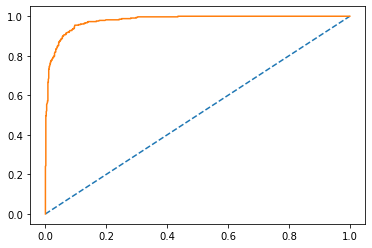

In [420]:
# predict probabilities
print('Train')
probs =bag_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_tune_train_auc)
# calculate roc curve
bag_tune_train_fpr, bag_tune_train_tpr, bag_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tune_train_fpr, bag_tune_train_tpr)

Test
AUC: 0.900


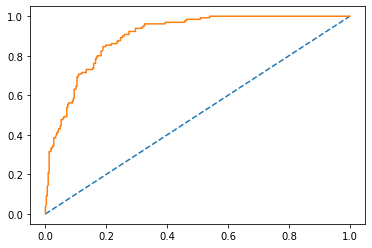

In [421]:
# predict probabilities
print('Test')
probs =bag_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_tune_test_auc)
# calculate roc curve
bag_tune_test_fpr, bag_tune_test_tpr, bag_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tune_test_fpr, bag_tune_test_tpr)

### XGBoost Classifier

In [422]:
xgb_tune.fit(x_train,y_train)
xgb_tune_train_score=xgb_tune.score(x_train,y_train)
xgb_tune_test_score=xgb_tune.score(x_test,y_test)

In [423]:
xgb_tune_clas_report_train=classification_report(y_train,xgb_tune.predict(x_train),output_dict=True)
xgb_tune_clas_report_test=classification_report(y_test,xgb_tune.predict(x_test),output_dict=True)
xgb_tune_precision_labour_train=xgb_tune_clas_report_train['0']['precision']
xgb_tune_precision_labour_test=xgb_tune_clas_report_test['0']['precision']
xgb_tune_precision_conser_train=xgb_tune_clas_report_train['1']['precision']
xgb_tune_precision_conser_test=xgb_tune_clas_report_test['1']['precision']

In [424]:
xgb_tune_recall_labour_train=xgb_tune_clas_report_train['0']['recall']
xgb_tune_recall_labour_test=xgb_tune_clas_report_test['0']['recall']
xgb_tune_recall_conser_train=xgb_tune_clas_report_train['1']['recall']
xgb_tune_recall_conser_test=xgb_tune_clas_report_test['1']['recall']

In [425]:
print('Train')
print('Accuracy score')
print(xgb_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,xgb_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,xgb_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(xgb_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,xgb_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,xgb_tune.predict(x_test)))

Train
Accuracy score
0.8847235238987816
 
Confusion Matrix
[[686  49]
 [ 74 258]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       735
           1       0.84      0.78      0.81       332

    accuracy                           0.88      1067
   macro avg       0.87      0.86      0.86      1067
weighted avg       0.88      0.88      0.88      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8187772925764192
 
Confusion Matrix
[[282  46]
 [ 37  93]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       328
           1       0.67      0.72      0.69       130

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458



Train
AUC: 0.948


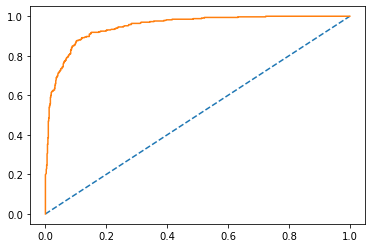

In [426]:
# predict probabilities
print('Train')
probs =xgb_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_tune_train_auc)
# calculate roc curve
xgb_tune_train_fpr, xgb_tune_train_tpr, xgb_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tune_train_fpr, xgb_tune_train_tpr)

Test
AUC: 0.885


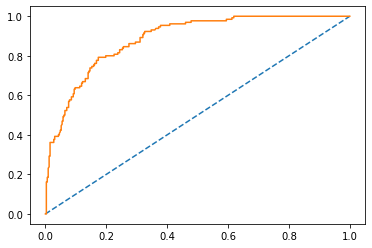

In [427]:
# predict probabilities
print('Test')
probs =xgb_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_tune_test_auc)
# calculate roc curve
xgb_tune_test_fpr, xgb_tune_test_tpr, xgb_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tune_test_fpr, xgb_tune_test_tpr)

### AdaBoost Classifier

In [428]:
ada_tune.fit(x_train,y_train)
ada_tune_train_score=ada_tune.score(x_train,y_train)
ada_tune_test_score=ada_tune.score(x_test,y_test)

In [429]:
ada_tune_clas_report_train=classification_report(y_train,ada_tune.predict(x_train),output_dict=True)
ada_tune_clas_report_test=classification_report(y_test,ada_tune.predict(x_test),output_dict=True)
ada_tune_precision_labour_train=ada_tune_clas_report_train['0']['precision']
ada_tune_precision_labour_test=ada_tune_clas_report_test['0']['precision']
ada_tune_precision_conser_train=ada_tune_clas_report_train['1']['precision']
ada_tune_precision_conser_test=ada_tune_clas_report_test['1']['precision']

In [430]:
ada_tune_recall_labour_train=ada_tune_clas_report_train['0']['recall']
ada_tune_recall_labour_test=ada_tune_clas_report_test['0']['recall']
ada_tune_recall_conser_train=ada_tune_clas_report_train['1']['recall']
ada_tune_recall_conser_test=ada_tune_clas_report_test['1']['recall']

In [431]:
print('Train')
print('Accuracy score')
print(ada_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,ada_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,ada_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(ada_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,ada_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,ada_tune.predict(x_test)))

Train
Accuracy score
0.8416119962511716
 
Confusion Matrix
[[663  72]
 [ 97 235]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       735
           1       0.77      0.71      0.74       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8165938864628821
 
Confusion Matrix
[[286  42]
 [ 42  88]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.68      0.68      0.68       130

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



Train
AUC: 0.902


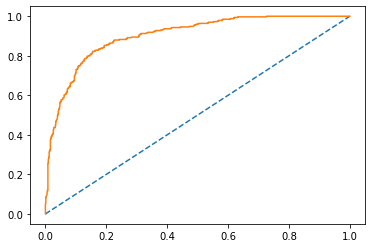

In [432]:
# predict probabilities
print('Train')
probs =ada_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ada_tune_train_auc)
# calculate roc curve
ada_tune_train_fpr, ada_tune_train_tpr, ada_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_tune_train_fpr, ada_tune_train_tpr)

Test
AUC: 0.881


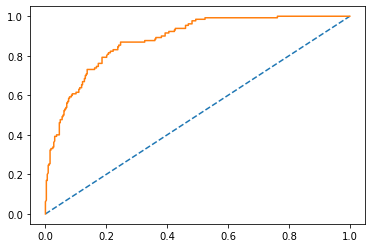

In [433]:
# predict probabilities
print('Test')
probs =ada_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ada_tune_test_auc)
# calculate roc curve
ada_tune_test_fpr, ada_tune_test_tpr, ada_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_tune_test_fpr, ada_tune_test_tpr)

### Gradient Boosting

In [434]:
gbc_tune.fit(x_train,y_train)
gbc_tune_train_score=gbc_tune.score(x_train,y_train)
gbc_tune_test_score=gbc_tune.score(x_test,y_test)

In [435]:
gbc_tune_clas_report_train=classification_report(y_train,gbc_tune.predict(x_train),output_dict=True)
gbc_tune_clas_report_test=classification_report(y_test,gbc_tune.predict(x_test),output_dict=True)
gbc_tune_precision_labour_train=gbc_tune_clas_report_train['0']['precision']
gbc_tune_precision_labour_test=gbc_tune_clas_report_test['0']['precision']
gbc_tune_precision_conser_train=gbc_tune_clas_report_train['1']['precision']
gbc_tune_precision_conser_test=gbc_tune_clas_report_test['1']['precision']

In [436]:
gbc_tune_recall_labour_train=gbc_tune_clas_report_train['0']['recall']
gbc_tune_recall_labour_test=gbc_tune_clas_report_test['0']['recall']
gbc_tune_recall_conser_train=gbc_tune_clas_report_train['1']['recall']
gbc_tune_recall_conser_test=gbc_tune_clas_report_test['1']['recall']

In [437]:
print('Train')
print('Accuracy score')
print(gbc_tune_train_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_train,gbc_tune.predict(x_train)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_train,gbc_tune.predict(x_train)))
print(' ')
print('-'*70)
print(' ')
print('Test')
print('Accuracy score')
print(gbc_tune_test_score)
print(' ')
print('Confusion Matrix')
print(confusion_matrix(y_test,gbc_tune.predict(x_test)))
print(' ')
print('Classification Report')
print(' ')
print(classification_report(y_test,gbc_tune.predict(x_test)))

Train
Accuracy score
0.9081537019681349
 
Confusion Matrix
[[695  40]
 [ 58 274]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       735
           1       0.87      0.83      0.85       332

    accuracy                           0.91      1067
   macro avg       0.90      0.89      0.89      1067
weighted avg       0.91      0.91      0.91      1067

 
----------------------------------------------------------------------
 
Test
Accuracy score
0.8144104803493449
 
Confusion Matrix
[[281  47]
 [ 38  92]]
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       328
           1       0.66      0.71      0.68       130

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.82       458



Train
AUC: 0.965


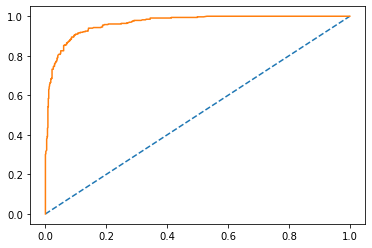

In [438]:
# predict probabilities
print('Train')
probs =gbc_tune.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbc_tune_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gbc_tune_train_auc)
# calculate roc curve
gbc_tune_train_fpr, gbc_tune_train_tpr, gbc_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbc_tune_train_fpr, gbc_tune_train_tpr)

Test
AUC: 0.887


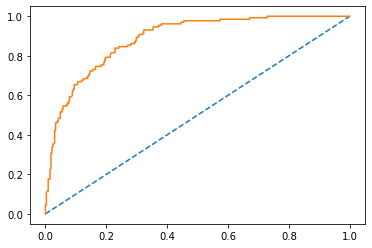

In [439]:
# predict probabilities
print('Test')
probs =gbc_tune.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbc_tune_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gbc_tune_test_auc)
# calculate roc curve
gbc_tune_test_fpr, gbc_tune_test_tpr, gbc_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbc_tune_test_fpr, gbc_tune_test_tpr)

### Before Tuning

In [388]:
index=['Accuracy_train', 'AUC_train','Recall_Labour_train','Precision_Labour_train','Recall_Conser_train','Precision_Conser_train']
data = pd.DataFrame({'Bagging_Train':[bag_train_score,bag_train_auc,bag_recall_labour_train,bag_precision_labour_train,bag_recall_conser_train,bag_recall_labour_train],
        'XGBoost_Train':[xgb_train_score,xgb_train_auc,xgb_recall_labour_train,xgb_precision_labour_train,xgb_recall_conser_train,xgb_recall_labour_train],
       'AdaBoost_Train':[ada_train_score,ada_train_auc,ada_recall_labour_train,ada_precision_labour_train,ada_recall_conser_train,ada_recall_labour_train],
        'GBoost_Train':[gbc_train_score,gbc_train_auc,gbc_recall_labour_train,gbc_precision_labour_train,gbc_recall_conser_train,gbc_recall_labour_train]},index=index)
print('Train')
round(data,2)

Train


,Bagging_Train,XGBoost_Train,AdaBoost_Train,GBoost_Train
Accuracy_train,0.95,0.97,0.84,0.88
AUC_train,0.99,1.00,0.90,0.94
Recall_Labour_train,0.98,0.98,0.90,0.92
Precision_Labour_train,0.95,0.97,0.87,0.90
Recall_Conser_train,0.90,0.93,0.71,0.78
Precision_Conser_train,0.98,0.98,0.90,0.92


In [389]:
index=['Accuracy_test', 'AUC_test','Recall_Labour_test','Precision_Labour_test','Recall_Conser_test','Precision_Conser_test']
data = pd.DataFrame({'Bagging_test':[bag_test_score,bag_test_auc,bag_recall_labour_test,bag_precision_labour_test,bag_recall_conser_test,bag_recall_labour_test],
        'XGBoost_test':[xgb_test_score,xgb_test_auc,xgb_recall_labour_test,xgb_precision_labour_test,xgb_recall_conser_test,xgb_recall_labour_test],
       'AdaBoost_test':[ada_test_score,ada_test_auc,ada_recall_labour_test,ada_precision_labour_test,ada_recall_conser_test,ada_recall_labour_test],
        'GBoost_test':[gbc_test_score,gbc_test_auc,gbc_recall_labour_test,gbc_precision_labour_test,gbc_recall_conser_test,gbc_recall_labour_test]},index=index)
print('Test')
round(data,2)

Test


,Bagging_test,XGBoost_test,AdaBoost_test,GBoost_test
Accuracy_test,0.81,0.81,0.81,0.82
AUC_test,0.89,0.86,0.88,0.90
Recall_Labour_test,0.87,0.84,0.87,0.86
Precision_Labour_test,0.87,0.88,0.87,0.89
Recall_Conser_test,0.68,0.71,0.68,0.72
Precision_Conser_test,0.87,0.84,0.87,0.86


### After Tuning

In [440]:
index=['Accuracy_train', 'AUC_train','Recall_Labour_train','Precision_Labour_train','Recall_Conser_train','Precision_Conser_train']
data = pd.DataFrame({'Bagging_Train':[bag_tune_train_score,bag_tune_train_auc,bag_tune_recall_labour_train,bag_tune_precision_labour_train,bag_tune_recall_conser_train,bag_tune_recall_labour_train],
        'XGBoost_Train':[xgb_tune_train_score,xgb_tune_train_auc,xgb_tune_recall_labour_train,xgb_tune_precision_labour_train,xgb_tune_recall_conser_train,xgb_tune_recall_labour_train],
       'AdaBoost_Train':[ada_tune_train_score,ada_tune_train_auc,ada_tune_recall_labour_train,ada_tune_precision_labour_train,ada_tune_recall_conser_train,ada_tune_recall_labour_train],
        'GBoost_Train':[gbc_tune_train_score,gbc_tune_train_auc,gbc_tune_recall_labour_train,gbc_tune_precision_labour_train,gbc_tune_recall_conser_train,gbc_tune_recall_labour_train]},index=index)
print('Train')
round(data,2)

Train


,Bagging_Train,XGBoost_Train,AdaBoost_Train,GBoost_Train
Accuracy_train,0.93,0.88,0.84,0.91
AUC_train,0.98,0.95,0.90,0.96
Recall_Labour_train,0.96,0.93,0.90,0.95
Precision_Labour_train,0.94,0.90,0.87,0.92
Recall_Conser_train,0.87,0.78,0.71,0.83
Precision_Conser_train,0.96,0.93,0.90,0.95


In [441]:
index=['Accuracy_test', 'AUC_test','Recall_Labour_test','Precision_Labour_test','Recall_Conser_test','Precision_Conser_test']
data = pd.DataFrame({'Bagging_test':[bag_tune_test_score,bag_tune_test_auc,bag_tune_recall_labour_test,bag_tune_precision_labour_test,bag_tune_recall_conser_test,bag_tune_recall_labour_test],
        'XGBoost_test':[xgb_tune_test_score,xgb_tune_test_auc,xgb_tune_recall_labour_test,xgb_tune_precision_labour_test,xgb_tune_recall_conser_test,xgb_tune_recall_labour_test],
       'AdaBoost_test':[ada_tune_test_score,ada_tune_test_auc,ada_tune_recall_labour_test,ada_tune_precision_labour_test,ada_tune_recall_conser_test,ada_tune_recall_labour_test],
        'GBoost_test':[gbc_tune_test_score,gbc_tune_test_auc,gbc_tune_recall_labour_test,gbc_tune_precision_labour_test,gbc_tune_recall_conser_test,gbc_tune_recall_labour_test]},index=index)
print('Test')
round(data,2)

Test


,Bagging_test,XGBoost_test,AdaBoost_test,GBoost_test
Accuracy_test,0.83,0.82,0.82,0.81
AUC_test,0.90,0.89,0.88,0.89
Recall_Labour_test,0.88,0.86,0.87,0.86
Precision_Labour_test,0.88,0.88,0.87,0.88
Recall_Conser_test,0.71,0.72,0.68,0.71
Precision_Conser_test,0.88,0.86,0.87,0.86


**-------------------------------------------------------------------------------------------------------------------------------**

**-------------------------------------------------------------------------------------------------------------------------------**

# Problem 2

In [252]:
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [292]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\RAM
[nltk_data]     KISHORE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [253]:
nltk.download('inaugural')
from nltk.corpus import ainaugural

[nltk_data] Downloading package inaugural to C:\Users\RAM
[nltk_data]     KISHORE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


In [254]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [256]:
roos_1941=inaugural.raw('1941-Roosevelt.txt')
kenn_1961=inaugural.raw('1961-Kennedy.txt')
nixo_1973=inaugural.raw('1973-Nixon.txt')

In [297]:
corp_roosevelt = nltk.corpus.PlaintextCorpusReader('D:\\ANALYTICS\\GREAT LEARNING\\24.Machine Learning-Week-4\\Roosevelt', '.*\.txt')
corp_kennedy=nltk.corpus.PlaintextCorpusReader('D:\\ANALYTICS\\GREAT LEARNING\\24.Machine Learning-Week-4\\Kennedy', '.*\.txt')
corp_nixon=nltk.corpus.PlaintextCorpusReader('D:\\ANALYTICS\\GREAT LEARNING\\24.Machine Learning-Week-4\\Nixon', '.*\.txt')

**-------------------------------------------------------------------------------------------------------------------------------**

### Finding no: of words,characters and sentences in documents

**Kennedy Speech-1941**

In [298]:
print('The number of sentences = ', len(corp_kennedy.sents()))
print('The number of words = ', len([word for sentence in corp_kennedy.sents() for word in sentence]))
print('The number of characters = ', len([char for sentence in corp_kennedy.sents() for word in sentence for char in word])) 

The number of sentences =  52
The number of words =  1546
The number of characters =  6202


**Roosevelt Speech-1941**

In [300]:
print('The number of sentences = ', len(corp_roosevelt.sents()))
print('The number of words = ', len([word for sentence in corp_roosevelt.sents() for word in sentence]))
print('The number of characters = ', len([char for sentence in corp_roosevelt.sents() for word in sentence for char in word])) 

The number of sentences =  68
The number of words =  1536
The number of characters =  6174


**Nixon Speech-1941**

In [302]:
print('The number of sentences = ', len(corp_nixon.sents()))
print('The number of words = ', len([word for sentence in corp_nixon.sents() for word in sentence]))
print('The number of characters = ', len([char for sentence in corp_nixon.sents() for word in sentence for char in word])) 

The number of sentences =  69
The number of words =  2028
The number of characters =  8122


**-------------------------------------------------------------------------------------------------------------------------------**

### Removing Stopwords from the documents

In [337]:
words_roose=list(inaugural.words('1941-Roosevelt.txt'))
words_kennedy=list(inaugural.words('1961-Kennedy.txt'))
words_nixon=list(inaugural.words('1973-Nixon.txt'))

In [311]:
from nltk.corpus import stopwords

In [319]:
stop_words=stopwords.words('english')
stop_upd=[',','.','--']
stop_words.extend(stop_upd)
stop_words=set(stop_words)
stop_words

{',',
 '--',
 '.',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 

Removing Stop words in Roosevelt

In [341]:
for i in range(len(words_roose)):
    words_roose[i]=words_roose[i].lower()
for i in stop_words:
    if i in words_roose:
        while i in words_roose:
            words_roose.remove(i)
nltk.FreqDist(words_roose)

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

Removing Stop words in Kennedy

In [343]:
for i in range(len(words_kennedy)):
    words_kennedy[i]=words_kennedy[i].lower()
for i in stop_words:
    if i in words_kennedy:
        while i in words_kennedy:
            words_kennedy.remove(i)
nltk.FreqDist(words_kennedy)

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

Removing Stop words in Nixon

In [345]:
for i in range(len(words_nixon)):
    words_nixon[i]=words_nixon[i].lower()
for i in stop_words:
    if i in words_nixon:
        while i in words_nixon:
            words_nixon.remove(i)
nltk.FreqDist(words_nixon)

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, "'": 14, 'nation': 11, 'responsibility': 11, 'government': 10, ...})

**-------------------------------------------------------------------------------------------------------------------------------**

### Finding the most no: of occurences of words in each document

Common words Roosevelt Speech

In [346]:
nltk.FreqDist(words_roose).most_common(3)

[('nation', 12), ('know', 10), ('spirit', 9)]

Common words in Kennedy Speech

In [347]:
nltk.FreqDist(words_kennedy).most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

Common words in Nixon Speech

In [348]:
nltk.FreqDist(words_nixon).most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

**-------------------------------------------------------------------------------------------------------------------------------**

### Wordcloud on the speech

In [355]:
!pip install wordcloud

In [358]:
from wordcloud import WordCloud,STOPWORDS

In [349]:
stop=stopwords.words('english')
stop_upd=[',','.','--']
stop.extend(stop_upd)
stop=set(stop)

WorldCloud on Roosevelt Speech

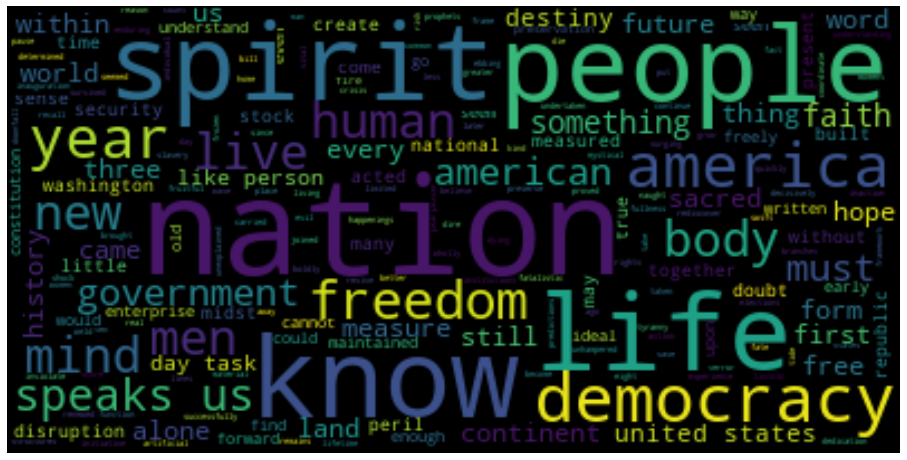

In [378]:
words_roose_str=' '.join(words_roose)
wordcloud = WordCloud(stopwords=stop,max_font_size=60).generate(words_roose_str)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

WorldCloud on Kennedy Speech

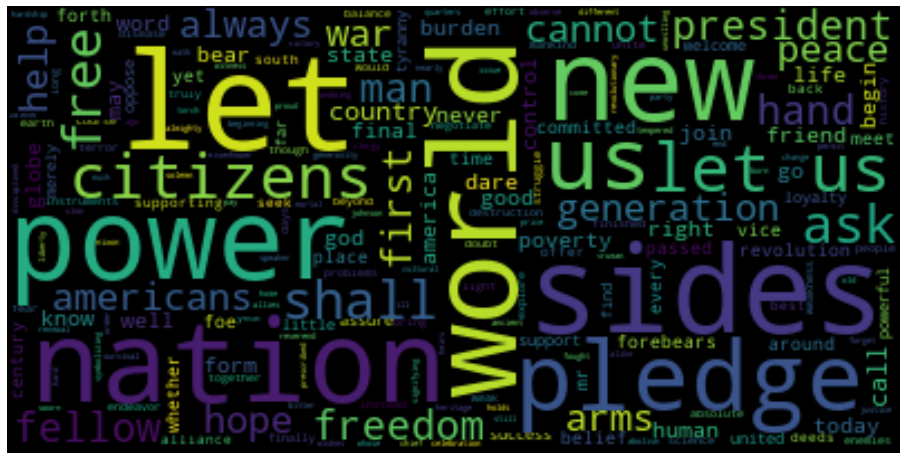

In [379]:
words_kennedy_str=' '.join(words_kennedy)
wordcloud = WordCloud(stopwords=stop,max_font_size=60).generate(words_kennedy_str)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Worldcloud on Nixon Speech

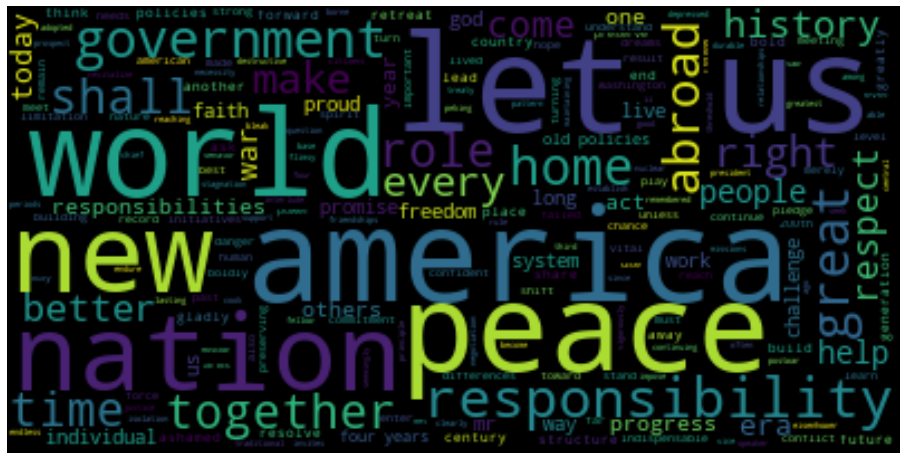

In [380]:
words_nixon_str=' '.join(words_nixon)
wordcloud = WordCloud(stopwords=stop,max_font_size=60).generate(words_nixon_str)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()